Enter time for simulation (Hours): 20
Enter Job Arrival Rate (/Hour): 7
Enter Job Service Rate (/Hour): 10


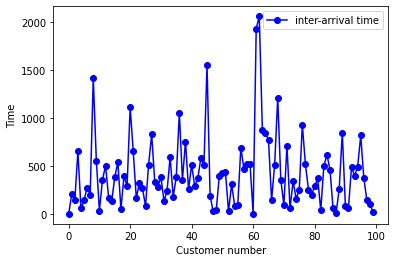

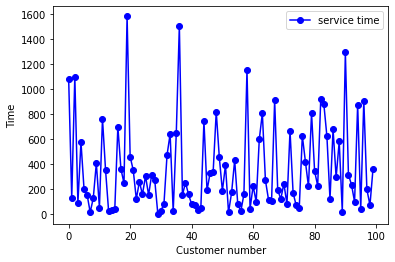

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Input Parameters
total_time = int(input("Enter time for simulation (Hours): "))
IAT_rate = int(input("Enter Job Arrival Rate (/Hour): "))
ST_rate = int(input("Enter Job Service Rate (/Hour): "))
rho = IAT_rate/ST_rate


# Initialize Parameters
IAT = []
ST = []
AT = []

num_processes = int(np.random.poisson(IAT_rate)* total_time)

# Populate Inter-Arrival-Times (IAT)
for i in range(num_processes):
    temp = np.random.exponential(1/IAT_rate)*60*60
    if i==0:
        IAT.append(0)
    else:
        IAT.append(int(temp))
        
# Populate Service-Times (ST) (where ST[i]!=0)
while not len(ST) == num_processes:
    temp = np.random.exponential(1/ST_rate)*60*60
    if not int(temp)<1:
        ST.append(int(temp))

# Get Arrival-Times (AT) from IAT starting at t=0
# and initialize Waiting-Times to 0
for i in range(num_processes):
    if i == 0:
        AT.append(0)    
    else:
        AT.append(AT[i-1] + IAT[i])
fig = plt.figure()
#fig.suptitle('Times between consecutive events in a simulated Poisson process')
plot, = plt.plot([i for i in range(num_processes)], IAT, 'bo-', label='inter-arrival time')
plt.legend(handles=[plot])
plt.xlabel('Customer number')
plt.ylabel('Time')
plt.show()

plot, = plt.plot([i for i in range(num_processes)], ST, 'bo-', label='service time')
plt.legend(handles=[plot])
plt.xlabel('Customer number')
plt.ylabel('Time')
plt.show()

rho2 = IAT_rate / ST_rate

pi = []
for j in range(num_processes-1):
    p = (1-rho2)*(rho2**j)
    pi.append(p)

In [ ]:
rho2 = IAT_rate / ST_rate
rho2

0.5555555555555556

In [ ]:
pi = []
for j in range(num_processes-1):
    p = (1-rho2)*(rho2**j)
    pi.append(p)
pi

[0.4444444444444444,
 0.24691358024691357,
 0.13717421124828533,
 0.0762078951379363,
 0.04233771952107572,
 0.023520955289486514,
 0.013067197383048063,
 0.0072595541016933695,
 0.0040330856120518715,
 0.0022406031178065955,
 0.0012447795098925532,
 0.0006915441721625296,
 0.00038419120675696087,
 0.00021343955930942272,
 0.00011857753294967929,
 6.587640719426628e-05,
 3.6598003996814596e-05,
 2.033222444267478e-05,
 1.1295680245930434e-05,
 6.275377914405797e-06,
 3.486321063558776e-06,
 1.936845035310431e-06,
 1.0760250196169063e-06,
 5.97791677564948e-07,
 3.321064875360822e-07,
 1.8450360418671236e-07,
 1.0250200232595131e-07,
 5.6945556847750725e-08,
 3.1636420470972634e-08,
 1.757578915054035e-08,
 9.764327305855751e-09,
 5.424626281030972e-09,
 3.0136812672394294e-09,
 1.674267370688572e-09,
 9.30148539271429e-10,
 5.167491884841272e-10,
 2.8708288249118176e-10,
 1.594904902728788e-10,
 8.86058279293771e-11,
 4.9225459960765057e-11,
 2.7347477755980588e-11,
 1.5193043197766994

In [ ]:
np.transpose(pi)

array([4.44444444e-01, 2.46913580e-01, 1.37174211e-01, 7.62078951e-02,
       4.23377195e-02, 2.35209553e-02, 1.30671974e-02, 7.25955410e-03,
       4.03308561e-03, 2.24060312e-03, 1.24477951e-03, 6.91544172e-04,
       3.84191207e-04, 2.13439559e-04, 1.18577533e-04, 6.58764072e-05,
       3.65980040e-05, 2.03322244e-05, 1.12956802e-05, 6.27537791e-06,
       3.48632106e-06, 1.93684504e-06, 1.07602502e-06, 5.97791678e-07,
       3.32106488e-07, 1.84503604e-07, 1.02502002e-07, 5.69455568e-08,
       3.16364205e-08, 1.75757892e-08, 9.76432731e-09, 5.42462628e-09,
       3.01368127e-09, 1.67426737e-09, 9.30148539e-10, 5.16749188e-10,
       2.87082882e-10, 1.59490490e-10, 8.86058279e-11, 4.92254600e-11,
       2.73474778e-11, 1.51930432e-11, 8.44057955e-12, 4.68921086e-12,
       2.60511715e-12, 1.44728730e-12, 8.04048502e-13, 4.46693612e-13,
       2.48163118e-13, 1.37868399e-13, 7.65935549e-14, 4.25519749e-14,
       2.36399861e-14, 1.31333256e-14, 7.29629200e-15, 4.05349556e-15,
      

In [ ]:
Ls = rho2/(1-rho2)
Ls

1.2500000000000002

In [ ]:
Lq = Ls - rho2
Lq

0.6944444444444446

In [ ]:
Ws = Ls/IAT_rate
Ws

0.25000000000000006

In [ ]:
Wq = Ws - (1/ST_rate)
Wq

0.13888888888888895